In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 20s - loss: 1.3916 - accuracy: 0.3125
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 1s 8ms/step - loss: 1.3795 - accuracy: 0.4119 - val_loss: 1.3613 - val_accuracy: 0.5023
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3657 - accuracy: 0.4531
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.3582 - accuracy: 0.4428 - val_loss: 1.3397 - val_accuracy: 0.5627
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3451 - accuracy: 0.4844
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.3338 - accuracy: 0.4743 - val_loss: 1.3110 - val_accuracy: 0.5808
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - lo

 1/32 [..............................] - ETA: 0s - loss: 0.6379 - accuracy: 0.7891
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7520 - val_loss: 0.4353 - val_accuracy: 0.9282
Epoch 28/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5787 - accuracy: 0.8125
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7621 - val_loss: 0.4219 - val_accuracy: 0.9313
Epoch 29/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5752 - accuracy: 0.7969
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.7714 - val_loss: 0.4127 - val_accuracy: 0.9328
Epoch 30/1000
 1/32 [..............................] - ETA: 0s - loss: 0.72

 1/32 [..............................] - ETA: 0s - loss: 0.5144 - accuracy: 0.8203
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.8046 - val_loss: 0.2888 - val_accuracy: 0.9569
Epoch 54/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5028 - accuracy: 0.8594
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.8061 - val_loss: 0.2851 - val_accuracy: 0.9509
Epoch 55/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4975 - accuracy: 0.7969
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.8024 - val_loss: 0.2788 - val_accuracy: 0.9569
Epoch 56/1000
 1/32 [..............................] - ETA: 0s - loss: 0.46

 1/32 [..............................] - ETA: 0s - loss: 0.4264 - accuracy: 0.8438
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8238 - val_loss: 0.2513 - val_accuracy: 0.9600
Epoch 80/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4667 - accuracy: 0.7891
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8180 - val_loss: 0.2497 - val_accuracy: 0.9592
Epoch 81/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4820 - accuracy: 0.7969
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8139 - val_loss: 0.2486 - val_accuracy: 0.9622
Epoch 82/1000
 1/32 [..............................] - ETA: 0s - loss: 0.43

 1/32 [..............................] - ETA: 0s - loss: 0.4336 - accuracy: 0.8438
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.8293 - val_loss: 0.2305 - val_accuracy: 0.9653
Epoch 106/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4514 - accuracy: 0.8203
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8255 - val_loss: 0.2310 - val_accuracy: 0.9630
Epoch 107/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3531 - accuracy: 0.8906
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8288 - val_loss: 0.2302 - val_accuracy: 0.9630
Epoch 108/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8984
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8366 - val_loss: 0.2148 - val_accuracy: 0.9690
Epoch 132/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8438
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8467 - val_loss: 0.2154 - val_accuracy: 0.9698
Epoch 133/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4254 - accuracy: 0.8906
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.8507 - val_loss: 0.2155 - val_accuracy: 0.9690
Epoch 134/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8672
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8525 - val_loss: 0.2013 - val_accuracy: 0.9721
Epoch 158/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8672
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8487 - val_loss: 0.2017 - val_accuracy: 0.9698
Epoch 159/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4804 - accuracy: 0.8047
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8457 - val_loss: 0.2007 - val_accuracy: 0.9690
Epoch 160/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4222 - accuracy: 0.8281
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8399 - val_loss: 0.1925 - val_accuracy: 0.9736
Epoch 184/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5082 - accuracy: 0.8594
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8439 - val_loss: 0.1932 - val_accuracy: 0.9736
Epoch 185/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4023 - accuracy: 0.8281
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8484 - val_loss: 0.1954 - val_accuracy: 0.9743
Epoch 186/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.5110 - accuracy: 0.8359
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8469 - val_loss: 0.1930 - val_accuracy: 0.9736
Epoch 210/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8984
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8477 - val_loss: 0.1924 - val_accuracy: 0.9751
Epoch 211/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5118 - accuracy: 0.7891
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8552 - val_loss: 0.1943 - val_accuracy: 0.9728
Epoch 212/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.5499 - accuracy: 0.8203
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8515 - val_loss: 0.1858 - val_accuracy: 0.9728
Epoch 236/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4667 - accuracy: 0.8125
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8590 - val_loss: 0.1841 - val_accuracy: 0.9698
Epoch 237/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4226 - accuracy: 0.8359
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8552 - val_loss: 0.1835 - val_accuracy: 0.9705
Epoch 238/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8828
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8608 - val_loss: 0.1795 - val_accuracy: 0.9751
Epoch 262/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3667 - accuracy: 0.8438
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8562 - val_loss: 0.1802 - val_accuracy: 0.9736
Epoch 263/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8906
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8603 - val_loss: 0.1809 - val_accuracy: 0.9736
Epoch 264/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4978 - accuracy: 0.8281
Epoch 287: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8535 - val_loss: 0.1732 - val_accuracy: 0.9781
Epoch 288/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8750
Epoch 288: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8575 - val_loss: 0.1721 - val_accuracy: 0.9773
Epoch 289/1000
 1/32 [..............................] - ETA: 0s - loss: 0.2892 - accuracy: 0.8594
Epoch 289: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8598 - val_loss: 0.1757 - val_accuracy: 0.9773
Epoch 290/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3390 - accuracy: 0.9141
Epoch 313: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8683 - val_loss: 0.1705 - val_accuracy: 0.9773
Epoch 314/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5093 - accuracy: 0.7734
Epoch 314: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8550 - val_loss: 0.1696 - val_accuracy: 0.9751
Epoch 315/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8594
Epoch 315: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8588 - val_loss: 0.1696 - val_accuracy: 0.9751
Epoch 316/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8594
Epoch 339: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8721 - val_loss: 0.1685 - val_accuracy: 0.9773
Epoch 340/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4063 - accuracy: 0.8438
Epoch 340: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8688 - val_loss: 0.1682 - val_accuracy: 0.9766
Epoch 341/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8906
Epoch 341: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8648 - val_loss: 0.1681 - val_accuracy: 0.9766
Epoch 342/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4302 - accuracy: 0.8438
Epoch 365: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8666 - val_loss: 0.1710 - val_accuracy: 0.9773
Epoch 366/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4234 - accuracy: 0.8281
Epoch 366: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8666 - val_loss: 0.1700 - val_accuracy: 0.9781
Epoch 367/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3702 - accuracy: 0.8828
Epoch 367: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8686 - val_loss: 0.1673 - val_accuracy: 0.9789
Epoch 368/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8984
Epoch 391: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8638 - val_loss: 0.1598 - val_accuracy: 0.9781
Epoch 392/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3451 - accuracy: 0.8359
Epoch 392: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8605 - val_loss: 0.1586 - val_accuracy: 0.9781
Epoch 393/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8750
Epoch 393: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8625 - val_loss: 0.1630 - val_accuracy: 0.9789
Epoch 394/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4545 - accuracy: 0.8281
Epoch 417: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8593 - val_loss: 0.1609 - val_accuracy: 0.9789
Epoch 418/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8906
Epoch 418: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8595 - val_loss: 0.1622 - val_accuracy: 0.9789
Epoch 419/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4093 - accuracy: 0.8359
Epoch 419: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8691 - val_loss: 0.1597 - val_accuracy: 0.9789
Epoch 420/1000
 1/32 [..............................] - ETA: 0s - loss

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 67ms/step
[0.934008   0.0220266  0.00909551 0.03486987]
0


# 混同行列

42/42 [==============================] - 0s 608us/step


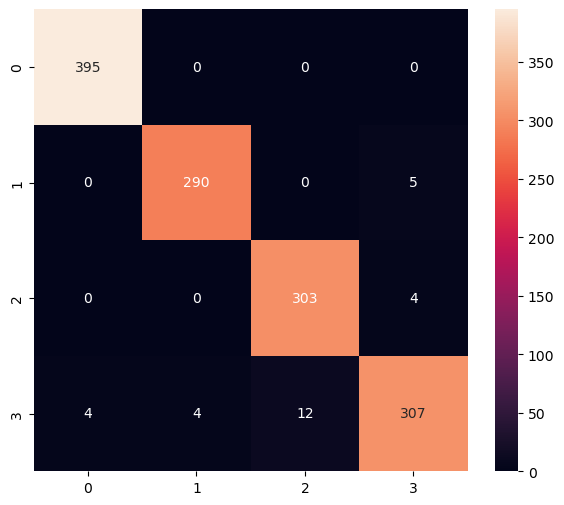

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.98       295
           2       0.96      0.99      0.97       307
           3       0.97      0.94      0.95       327

    accuracy                           0.98      1324
   macro avg       0.98      0.98      0.98      1324
weighted avg       0.98      0.98      0.98      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Hylte\AppData\Local\Temp\tmp6re9_u2k\assets


6432

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9340079  0.02202662 0.00909551 0.03486988]
0
